# Grover's Algorithm

Devised by Lov Grover in 1996, Gover's algorithm finds with high probability the unique input that produces a particular output value, using just $O(\sqrt(N))$ evaluations of the function, where $N$ is the size of the function's domain.

Using classical computation the same problem cannot be solved in fewer than $O(N)$ evaluations (because, in the worst case, the $N$-th member of the domain might be the correct member).

You can picture the algorithm in a context of a query in a database. With a Quantum computer, you would be able to find a given object in a database in $O(\sqrt(N))$ time. Using a traditional computer, the same operation would take $O(N)$ time. The quantum-computer is therefore exponentially faster than a traditional computer.

Before we start programming a real quantum computer, we first need to make sure we have all the tools needed.
Below are a few scripts that you should run in order to download before mentioned tools.
Click the box below and press the "Run" button, located at the top of this notebook.

In [1]:
#import pip
#!pip install qiskit
#!pip install matplotlib
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

If you followed the instructions above, you should now know how to run a script in Jupyter. Go ahead and run the next script as well, located below this message:

In [2]:
# Create a Quantum Register with 3 qubits.
qr = QuantumRegister(3,'q1')
# We also need to create a classical register to measure our values
cr = ClassicalRegister(3)
# Create a Quantum Circuit, combining our two registers.
circ = QuantumCircuit(qr,cr)

By running the two previous scripts, you should now have 1.) installed the tools needed to proceed in this notebook, 2.) have created a quantum- and a classical-register.
By running the next script, you will be able to see if everything got installed correctly. The output should be a printout of all our newly created registers:

q1_0: |0>
         
q1_1: |0>
         
q1_2: |0>
         
 c2_0: 0 
         
 c2_1: 0 
         
 c2_2: 0 

In [3]:
circ.draw()

# Oracle function

This function returns zero for all values except one.

In [4]:
#Init
circ.h(qr)
circ.barrier()

#Oracle operator for binary 110
circ.x(qr[0])
circ.h(qr[2])
circ.ccx(qr[0],qr[1],qr[2])
circ.x(qr[0])
circ.h(qr[2])
circ.barrier()

#Grover
circ.h(qr)
circ.x(qr)
circ.h(qr[2])
circ.ccx(qr[0],qr[1],qr[2])
circ.h(qr[2])
circ.x(qr)
circ.h(qr)
circ.barrier()

#Measure
circ.measure(qr,cr)

#Prepare draw
circ.draw();

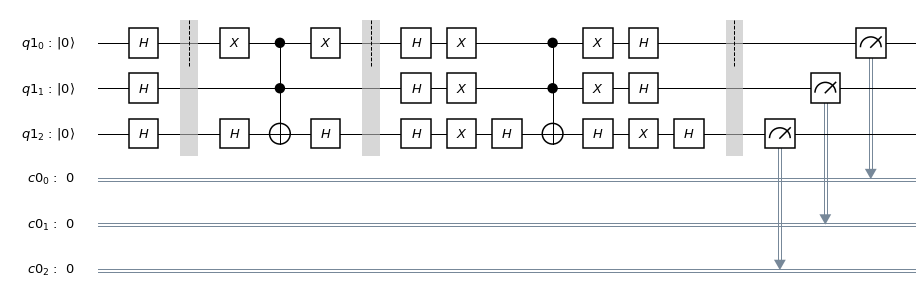

In [5]:
circ.draw(output='mpl')

In [6]:
from qiskit import IBMQ
#%run credentials.py
# We now save the account so we can use it with IBMQ
#IBMQ.save_account("de8b458767c048db841ebbbc7a7b1bb2a4004c5086812ca496261e6b89f02653814ae8f1db62e5108cd86a2edb6630d101a4df03ab6526de8c7fa55129c5770f")
# And now we register which account we are using.
IBMQ.load_accounts()

In [7]:
from qiskit.providers.ibmq import least_busy
#from qiskit import Aer

device = least_busy(IBMQ.backends())
#device = Aer.get_backend('ibmqx4')
#device = IBMQ.get_backend('ibmq_16_melbourne')

In [8]:
from qiskit.tools.monitor import job_monitor

# We excecute the job on the choosen device
job_sim = execute(circ, device,shots=1024)
# The job monitor makes it possible for us to monitor our job in real time
job_monitor(job_sim, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [9]:
# When the job is done, the results can be showed below.
sim_result = job_sim.result()
counts = sim_result.get_counts(circ)

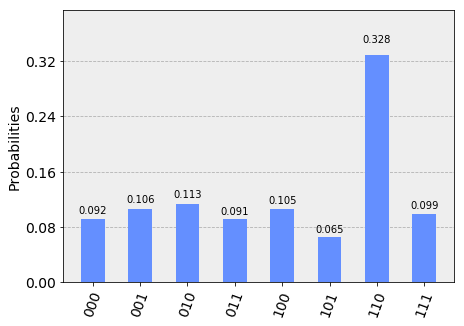

In [10]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [11]:
counts

{'011': 93,
 '010': 116,
 '101': 67,
 '110': 336,
 '111': 101,
 '100': 108,
 '000': 94,
 '001': 109}